## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [4]:
#Loading of dataset
df= pd.read_excel('dataset.xlsx')

## Data cleaning

In [5]:
df

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
...,...,...
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0


In [6]:
df.isna().sum()

text     10
label     2
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

**Let's make our label data more readable by replacing the binary with depressed and non-depressed**

In [6]:
df=df.replace(0,'not depressed')
df=df.replace(1,'depressed')

In [7]:
df

,text,label
0,oh my gosh,depressed
1,"trouble sleeping, confused mind, restless hear...",depressed
2,"All wrong, back off dear, forward doubt. Stay ...",depressed
3,I've shifted my focus to something else but I'...,depressed
4,"I'm restless and restless, it's been a month n...",depressed
...,...,...
6977,I can't forget you #SpiritHadrian,not depressed
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,not depressed
6979,Dai5y! <3,not depressed
6980,tired of clowns but still hopefully tonight if...,not depressed


In [8]:
df['label'].value_counts()

not depressed    6240
depressed         730
Name: label, dtype: int64

## Data visualization

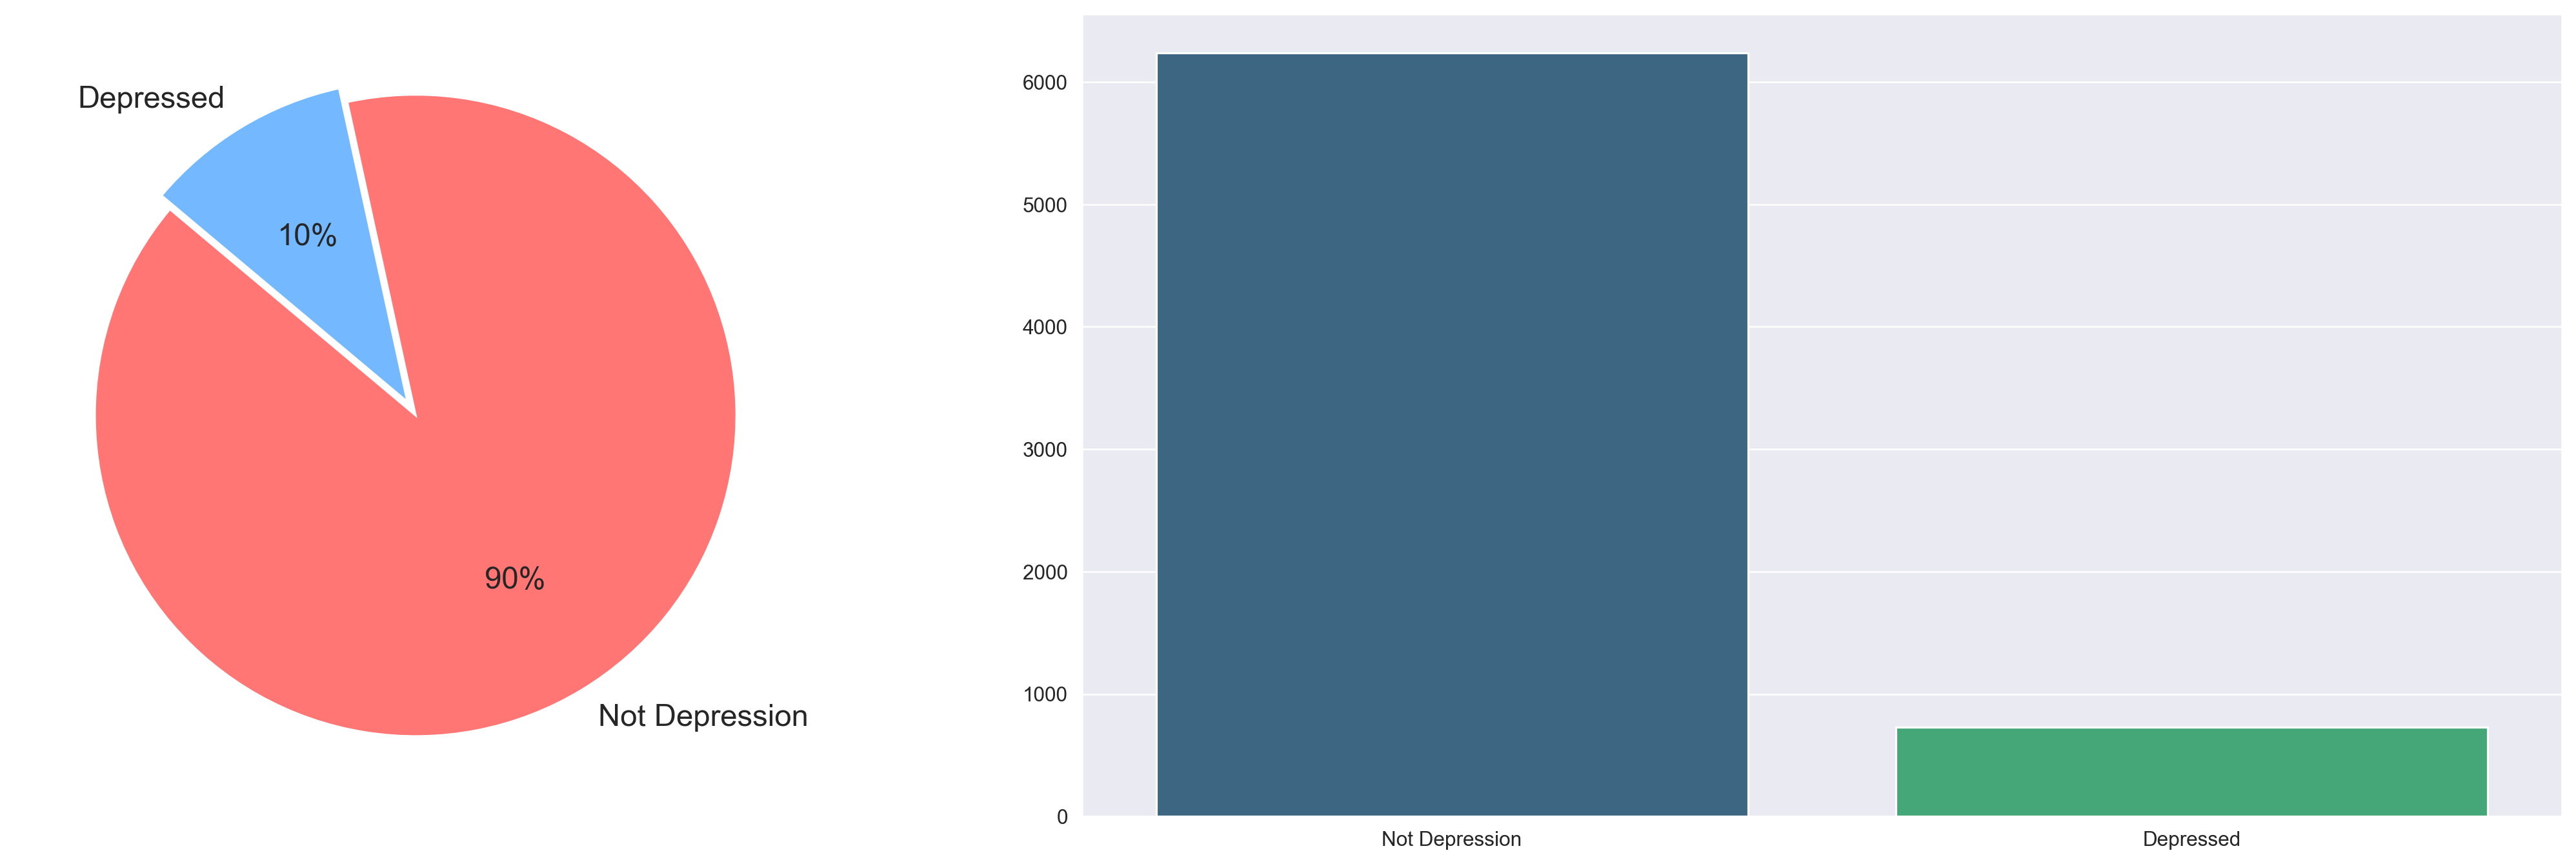

In [9]:
plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)


labels = ["Not Depression", "Depressed"]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.pie(sizes,
        labels = labels,
        textprops={'fontsize': 15},
        startangle=140,
        autopct='%1.0f%%',
        colors=custom_colours,
        explode=[0, 0.05])
plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')
plt.tight_layout()
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6970 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6970 non-null   object
 1   label   6970 non-null   object
dtypes: object(2)
memory usage: 163.4+ KB


from this visualization we can make an inference  that most of the comments are depression negative


## Data modelling


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
X = df["text"].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

In [13]:
vect=TfidfVectorizer(stop_words="english")

In [14]:
rfc=RandomForestClassifier()

In [15]:
train_x=vect.fit_transform(X_train)

In [16]:
rfc.fit(train_x,y_train)

RandomForestClassifier()

In [17]:
test_x=vect.transform(X_test)

In [18]:
pred=rfc.predict(test_x)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

    depressed       0.97      0.91      0.94       153
not depressed       0.99      1.00      0.99      1241

     accuracy                           0.99      1394
    macro avg       0.98      0.95      0.97      1394
 weighted avg       0.99      0.99      0.99      1394



In [21]:
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline([('vect', TfidfVectorizer()),('rfc', RandomForestClassifier()),])

**This performance metric result shows that our model is very accurate**

## Model Persistency and Full Training

In [23]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('rfc', RandomForestClassifier())])

In [24]:
pred_2=pipe.predict(X_test)

In [25]:
print(classification_report(y_test,pred_2))

               precision    recall  f1-score   support

    depressed       0.97      0.84      0.90       153
not depressed       0.98      1.00      0.99      1241

     accuracy                           0.98      1394
    macro avg       0.97      0.92      0.94      1394
 weighted avg       0.98      0.98      0.98      1394



## saving the model for deployment

In [31]:
pipe.fit(X,y)

Pipeline(steps=[('vect', TfidfVectorizer()), ('rfc', RandomForestClassifier())])

In [32]:
import joblib

In [33]:
joblib.dump(pipe,'depression_analyzer.pkl')

['depression_analyzer.pkl']

In [34]:
df.columns[0]

'text'

In [35]:
joblib.dump(df.columns[0],'chat_input.pkl')

['chat_input.pkl']